In [1]:
# CLean data from scraped reviews

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
%matplotlib inline

In [147]:
df = pd.read_csv('../scrape/scraped_reviews.csv')

In [4]:
len(df)

2034

In [148]:
df1 = df[['clinic_name','clinic_score','doc_score','success','income','Question 1','Answer 1']]
df1['Question'] = df1['Question 1']
df1['Answer']   = df1['Answer 1']
df2 = df[['clinic_name','clinic_score','doc_score','success','income','Question 2','Answer 2']]
df2['Question'] = df2['Question 2']
df2['Answer']   = df2['Answer 2']
df3 = df[['clinic_name','clinic_score','doc_score','success','income','Question 3','Answer 3']]
df3['Question'] = df3['Question 3']
df3['Answer']   = df3['Answer 3']
df4 = df[['clinic_name','clinic_score','doc_score','success','income','Question 4','Answer 4']]
df4['Question'] = df4['Question 4']
df4['Answer']   = df4['Answer 4']
df5 = df[['clinic_name','clinic_score','doc_score','success','income','Question 5','Answer 5']]
df5['Question'] = df5['Question 5']
df5['Answer']   = df5['Answer 5']
df6 = df[['clinic_name','clinic_score','doc_score','success','income','Question 6','Answer 6']]
df6['Question'] = df6['Question 6']
df6['Answer']   = df6['Answer 6']
df7 = df[['clinic_name','clinic_score','doc_score','success','income','Question 7','Answer 7']]
df7['Question'] = df7['Question 7']
df7['Answer']   = df7['Answer 7']
df8 = df[['clinic_name','clinic_score','doc_score','success','income','Question 8','Answer 8']]
df8['Question'] = df8['Question 8']
df8['Answer']   = df8['Answer 8']
df9 = df[['clinic_name','clinic_score','doc_score','success','income','Question 9','Answer 9']]
df9['Question'] = df9['Question 9']
df9['Answer']   = df9['Answer 9']
df10 = df[['clinic_name','clinic_score','doc_score','success','income','Question 10','Answer 10']]
df10['Question'] = df10['Question 10']
df10['Answer']   = df10['Answer 10']



#df_qa = pd.concat(df[['clinic_name']])

/Users/jacobberger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jacobberger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jacobberger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [186]:
df_qa = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10], ignore_index=True)

df_t = df_qa.drop(['Question 1','Answer 1','Question 2','Answer 2','Question 3','Answer 3','Question 4','Answer 4',
                   'Question 5','Answer 5','Question 6','Answer 6','Question 7','Answer 7','Question 8','Answer 8',
                   'Question 9','Answer 9','Question 10','Answer 10'], axis=1)

In [187]:
df_t.isnull().sum()

clinic_name        0
clinic_score     360
doc_score          0
success            0
income             0
Question        5414
Answer          5510
dtype: int64

In [151]:
df_t.shape

(20340, 7)

In [188]:
df_t = df_t.dropna().reset_index(drop=True)


In [183]:
def replace_q (val):
    if val[:28]=='How was your experience with':
        val = 'experience with doctor'   # classify under doctor
    elif val[:16] =='During treatment':  # Treated like num or human
        val = "experience with doctor"   # classify under doctor
    elif val[:16] == "What's one piece":
        val = 'advice give prospective patient'
    elif val[:40] == "Describe your experience with your nurse":
        val = "experience with nurse"
    elif val[:42] == "Describe your experience with your nursing":
        val = "experience with nurse"
    elif val[:29]=="Describe your experience with":
        val = "experience with clinic"
    elif val[:22] == "Describe the protocols":
        val = "protocols and success"
    elif val[:18]== "Describe the costs":
        val = "cost"
    elif val[:31] == "What specific things went wrong":
        val = "specific things went wrong"
    else:
        if "eSET" in val:
            val = "eSET vs. multiple embryo transfer"
        else:
            val=val
       
    return val
    

In [222]:
human = data[data.Question=="experience with nurse"]['Answer']

In [223]:
len(human)

1075

In [189]:
df_t.Question = df_t.Question.apply(replace_q)

In [190]:
for i,q in enumerate (df_t.Question.unique()):
    #if type(q)==float:
    print (i, q)

0 experience with doctor
1 advice give prospective patient
2 experience with nurse
3 experience with clinic
4 protocols and success
5 cost
6 eSET vs. multiple embryo transfer
7 specific things went wrong


In [191]:
def failed_list(text):
    if "<ul" in text:
        text_list = text.split(">")
        fail_list =[]
        for i in text_list:
            if "</li" in i:
                fail_list.append(i.split('<')[0])
        doc = ', '.join(fail_list)
        return doc
    
    else:
        return text

In [192]:
df_t.Answer = df_t.Answer.apply(failed_list)

In [193]:
df_t.to_csv('reviews.csv')

In [194]:
data = pd.read_csv('reviews.csv')

In [132]:
df_t[df_t.doc_score<7]

,clinic_name,clinic_score,doc_score,success,income,Question,Answer
10,Columbia University,7.0,4,?,$100K - $199K,experience with doctor at clinic,"Again, I only saw her once and she responded t..."
41,Columbia University,0.0,5,No,$200K - $499K,experience with doctor at clinic,Dr. Grossman as an individual is compassionate...
49,Columbia University,0.0,0,No,$200K - $499K,experience with doctor at clinic,Communication skills are poor. Next steps were...
50,Columbia University,0.0,0,No,$200K - $499K,experience with doctor at clinic,I don't know if Dr. Rackow is really familiar ...
51,Columbia University,1.0,0,No,$200K - $499K,experience with doctor at clinic,Dr. McConnell seemed like a warm person and sh...
...,...,...,...,...,...,...,...
14630,RMA of New Jersey,3.0,6,No,$200K - $499K,specific things that went wrong,"[<ul class=""reviewer-clinic-fails__list""><li c..."
14631,RMA of New Jersey,6.0,5,No,—,specific things that went wrong,"[<ul class=""reviewer-clinic-fails__list""><li c..."
14642,RMA of New Jersey,5.0,5,No,$200K - $499K,specific things that went wrong,"[<ul class=""reviewer-clinic-fails__list""><li c..."
14646,RMA of New Jersey,2.0,6,Yes,$50K - $99K,specific things that went wrong,"[<ul class=""reviewer-clinic-fails__list""><li c..."


In [ ]:
# Clean answers
# remove common words and stopwords

# Remove words from data that are too common
def remove_common_words(val):
    list_of_common_words = ['time','questions','really','ask',
                            'know','patients','think','said','day']
    for i in range(len(list_of_common_words)):
        val = val.replace(list_of_common_words[i],'')
    return val

df['text_string'] = df.text_string.apply(remove_common_words)

df['text_string'] = df['text_string'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['text_string'] = df['text_string'].map(lambda x: x.lower())


In [6]:
import nltk


In [15]:
# Function to clean scraped data
wpt = nltk.WordPunctTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    #doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [145]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [146]:
intro_text = df_t.Answer[0]

In [147]:
intro_text

"Dr. Rudick is very professional and knowledgeable. She never pushed me to do something I was not ready to do, and let me set the pace of my treatments. When I decided to take a short break between cycles, she was very understanding. She is also very straight forward and matter-of fact with results and reasons for those results, and she doesn't sugar-coat, which I appreciated and which added to my trust of her. When I received bad news after a few cycles back to back, Dr. Rudick sent me a very nice email and I felt that we were  in this together, working toward a common goal. Although Dr. Rudick was not always available at every visit, all of the doctors and nurses at Columbia were pleasant to work with. Before and during each procedure, Dr. Rudick would explain each step in detail, which helped ease my anxiety. I felt very cared for by her and the team at Columbia."

In [282]:
intro_doc = nlp(intro_text)

In [283]:
intro_doc

Dr. Rudick is very professional and knowledgeable. She never pushed me to do something I was not ready to do, and let me set the pace of my treatments. When I decided to take a short break between cycles, she was very understanding. She is also very straight forward and matter-of fact with results and reasons for those results, and she doesn't sugar-coat, which I appreciated and which added to my trust of her. When I received bad news after a few cycles back to back, Dr. Rudick sent me a very nice email and I felt that we were  in this together, working toward a common goal. Although Dr. Rudick was not always available at every visit, all of the doctors and nurses at Columbia were pleasant to work with. Before and during each procedure, Dr. Rudick would explain each step in detail, which helped ease my anxiety. I felt very cared for by her and the team at Columbia.

In [153]:
# Step 1 convert text to spacy doc object
def spacy_doc (text):
    return nlp(text)
# Step 2 either convert into sentences or remove stopwords

# Step 3 Lemmatization 

In [154]:
sentences = list(intro_doc.sents)

In [155]:
sentences

[Dr. Rudick is very professional and knowledgeable.,
 She never pushed me to do something I was not ready to do, and let me set the pace of my treatments.,
 When I decided to take a short break between cycles, she was very understanding.,
 She is also very straight forward and matter-of fact with results and reasons for those results, and she doesn't sugar-coat, which I appreciated and which added to my trust of her.,
 When I received bad news after a few cycles back to back, Dr. Rudick sent me a very nice email and I felt that we were  in this together, working toward a common goal.,
 Although Dr. Rudick was not always available at every visit, all of the doctors and nurses at Columbia were pleasant to work with.,
 Before and during each procedure, Dr. Rudick would explain each step in detail, which helped ease my anxiety.,
 I felt very cared for by her and the team at Columbia.]

In [280]:
def remove_punc(text):
    punc_list = ['.',',',"!",'*','?','-']
    text = ''.join(char for char in text if char not in punc_list)
    return text

In [162]:
#https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens


import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer

def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jacobberger/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [170]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

In [171]:
#list of words to not remove
remove_form_stop_words = ['no','not',"aren't","couldn't","didn't","doesn't",
                          "wasn't","wouldn't","won't"]
for w in remove_form_stop_words:
    en_stop.remove(w)

In [182]:
#from pycontractions import Contractions
import contractions

In [160]:
test = tokenize(intro_text)

In [284]:
def prepare_text_for_lda(text):
    
    text = remove_punc(text)
    
    tokens = tokenize(text)
    
    # Contractions
    #tokens = [contractions.fix(token) for token in tokens if "'" in token]
    #tokens = [token for token in tokens if len(token) > 2]
    # Remove Stop Words
    tokens = [token for token in tokens if token not in en_stop]
    #Lemmatization
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [267]:
df_answers = df_t.Answer.apply(prepare_text_for_lda)

In [272]:
from gensim import corpora
dictionary = corpora.Dictionary(df_answers)

In [273]:
corpus = [dictionary.doc2bow(text) for text in df_answers]

In [274]:
import gensim
NUM_TOPICS = 8
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

In [291]:
from sklearn.pipeline import Pipeline

# Cleaning data

In [196]:
import numpy as np
import pandas as pd

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
#import en_core_web_lg

In [ ]:
# Remove stop words
# Lemmatize
# Remove punctuation

In [197]:
# Remove Stopwords
# Function to clean scraped data
wpt = nltk.WordPunctTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    #doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

def remove_punc(text):
    punc_list = ['.',',',"!",'*','?','-']
    text = ''.join(char for char in text if char not in punc_list)
    return text

In [198]:
data['answers'] = data.Answer.apply(normalize_document)
data['answers'] = data.answers.apply(remove_punc)

In [199]:
data.answers

0        dr  rudick professional knowledgeable  never p...
1        dr  forman listened concerns good first time i...
2        ' enough words describe amazing dr  eric forma...
3        level contact patience patient goes beyond doc...
4        physician  impressed dr  brady ' clinical know...
                               ...                        
14645                                    lost appointments
14646    failed order appropriate test  failed send cha...
14647                     provided conflicting information
14648                     provided conflicting information
14649                        failed order appropriate test
Name: answers, Length: 14650, dtype: object

In [43]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en.stop_words import STOP_WORDS
nlp= spacy.load("en")
def lemmatizer(doc):
    # This takes in a doc of tokens from the NER and lemmatizes them. 
    # Pronouns (like "I" and "you" get lemmatized to '-PRON-', so I'm removing those.
    doc = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
    doc = u' '.join(doc)
    return nlp.make_doc(doc)
    
def remove_stopwords(doc):
    nlp= spacy.load("en")
    # This will remove stopwords and punctuation.
    # Use token.text to return strings, which we'll need for Gensim.
    doc = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
    return doc

In [47]:
lemmatizer(nlp(data.Answer[0]))

Dr. Rudick be very professional and knowledgeable . never push to do something be not ready to do , and let set the pace of treatment . when decide to take a short break between cycle , be very understanding . be also very straight forward and matter - of fact with result and reason for those result , and do not sugar - coat , which appreciate and which add to trust of . when receive bad news after a few cycle back to back , Dr. Rudick send a very nice email and feel that be   in this together , work toward a common goal . although Dr. Rudick be not always available at every visit , all of the doctor and nurse at Columbia be pleasant to work with . before and during each procedure , Dr. Rudick would explain each step in detail , which help ease anxiety . feel very care for by and the team at Columbia .

In [201]:
def preprocessor(text):
    if type(text) == str:
        text = re.sub('<[^>]*>', '', text)
        text = re.sub('[\W]+', '', text.lower())
    return text



def spacy_clean_text(review):
                 
    nlp = English()
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    tokens = tokenizer(review)
    
    lemma_list = []
    n=0
    for token in tokens:
        if token.is_stop is False:
            token_preprocessed = preprocessor(token.lemma_)
            if token_preprocessed != '':
                lemma_list.append(token_preprocessed) 
                
    return (lemma_list)

In [202]:
data['token_answers'] = data.Answer.apply(spacy_clean_text)

In [215]:
data.to_csv('reviews_token.csv')

In [203]:
def combine_token(text):
    text = ' '.join(text)
    return text

In [204]:
data['clean_text'] = data.token_answers.apply(combine_token)

In [218]:
data.loc[2059]

Unnamed: 0                                  2059
clinic_name                  Columbia University
clinic_score                                   0
doc_score                                      0
success                                       No
income                                         —
Question         advice give prospective patient
Answer                             Go elsewhere.
answers                            go elsewhere 
token_answers                                 []
clean_text                                      
Name: 2059, dtype: object

In [68]:
from sklearn.model_selection import train_test_split

In [206]:
msg_train, msg_test, label_train, label_test = train_test_split(data.clean_text, data.Question, test_size=0.3)

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [116]:
vec = CountVectorizer()

In [117]:
data_bow = vec.fit_transform(data.clean_text)


In [118]:
from sklearn.feature_extraction.text import TfidfTransformer

In [124]:
tfidf_transformer = TfidfTransformer().fit_transform(data_bow)

In [207]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [208]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [209]:
predictions = pipeline.predict(msg_test)

In [210]:
from sklearn.metrics import classification_report, confusion_matrix

In [211]:
print(confusion_matrix(label_test,predictions))
print('\n')
print(classification_report(label_test,predictions))

[[ 132    0    0   46  367    0    1    0]
 [   0  434    0   25   21    0    4    0]
 [   1    2  123    2  107    0    9    0]
 [   0    1    0  820  187    0    1    0]
 [   0    0    0   60 1100    1    6    0]
 [   0    0    0  131  164   11    0    0]
 [   1    4    0    1   97    0  361    0]
 [   0    0    0    0    0    0    0  175]]


                                   precision    recall  f1-score   support

  advice give prospective patient       0.99      0.24      0.39       546
                             cost       0.98      0.90      0.94       484
eSET vs. multiple embryo transfer       1.00      0.50      0.67       244
           experience with clinic       0.76      0.81      0.78      1009
           experience with doctor       0.54      0.94      0.69      1167
            experience with nurse       0.92      0.04      0.07       306
            protocols and success       0.95      0.78      0.85       464
       specific things went wrong       1.00      1.

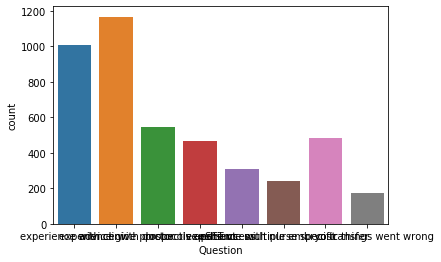

In [213]:
g = sns.countplot(label_test)


In [121]:
from sklearn.naive_bayes import MultinomialNB

In [126]:
label_model = MultinomialNB().fit(tfidf_transformer, data.Question)

# Prediction

In [127]:
data_test_bow = vec.transform(msg_test)

In [ ]:
data_test_tfidf = 